In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.xkcd()
plt.rcParams['font.family'] = "xkcd"

In [3]:
without_df = pd.read_csv(
    'results-without-env-var.csv', 
    header=None,
    names=['Sequence length', 'Allocated MiB', 'Reserved MiB', 'Iterations/second']
)
print(without_df.head())

   Sequence length  Allocated MiB  Reserved MiB  Iterations/second
0                1          10900         14024           7.203358
1                2          10900         14026           9.230602
2                3          10900         14026           9.161016
3                4          10900         14026           9.054015
4                5          10900         14028           9.067601


In [4]:
def plot(df):
    fig, ax1 = plt.subplots(figsize=(10, 5))

    ax1.plot(df['Sequence length'], df['Allocated MiB'], label='ALLOCATED MiB', color='red')
    ax1.plot(df['Sequence length'], df['Reserved MiB'], label='RESERVED MiB', color='green')
    ax1.set_xlabel('SEQUENCE LENGTH')
    ax1.set_ylabel('MiB')
    ax1.tick_params(axis='y')
    ax1.set_ylim(10000, 20000)
    
    ax2 = ax1.twinx()
    ax2.plot(df['Sequence length'], df['Iterations/second'], label='ITERATIONS/SECOND', color='blue')
    ax2.set_ylabel('ITERATIONS/SECOND')
    ax2.tick_params(axis='y')
    ax2.set_ylim(4, 10)
    
    plt.title('ALLOCATED MiB, RESERVED MiB, AND ITERATIONS/SECOND vs SEQUENCE LENGTH')
    fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

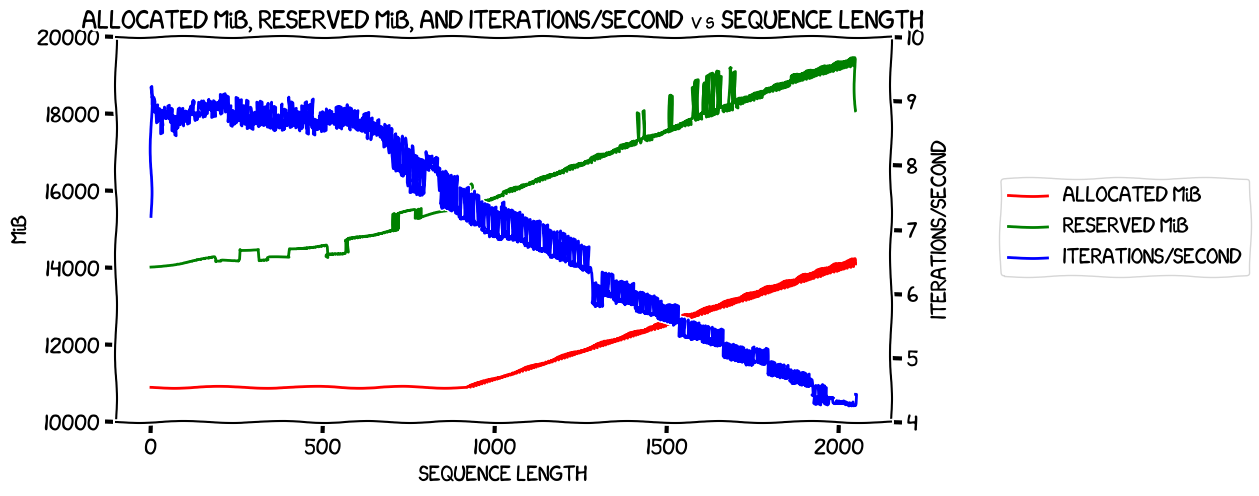

In [5]:
plot(without_df)

plt.savefig("/tmp/, ")
plt.show()

In [6]:
with_df = pd.read_csv('results-with-env-var.csv', header=None, names=['Sequence length', 'Allocated MiB', 'Reserved MiB', 'Iterations/second'])
print(with_df.head())

   Sequence length  Allocated MiB  Reserved MiB  Iterations/second
0                1          10896         13046           7.111519
1                2          10896         13046           9.186950
2                3          10896         13048           9.219742
3                4          10896         13048           9.095285
4                5          10896         13050           8.810223


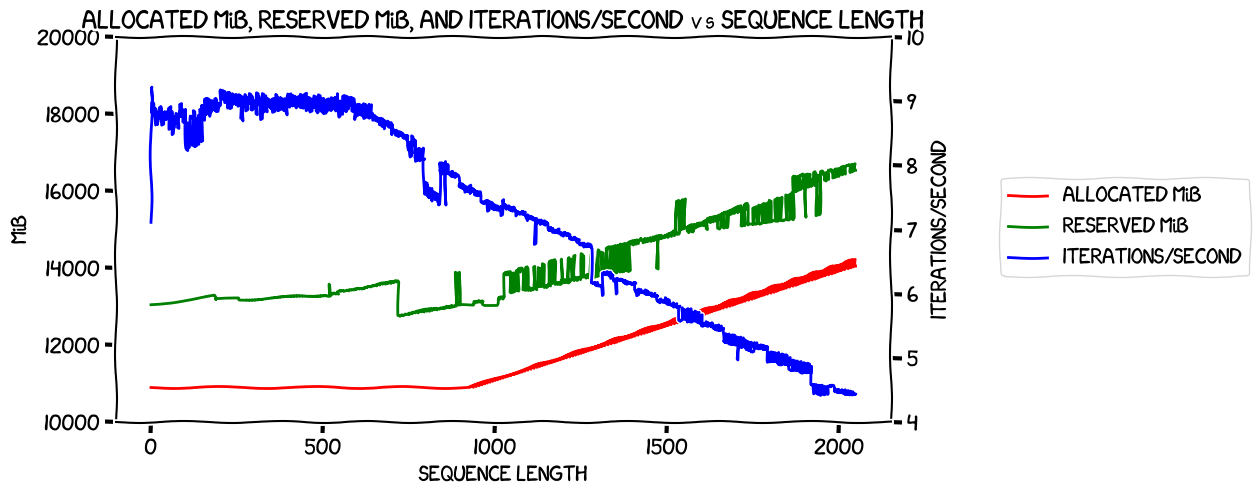

In [7]:
plot(with_df)

plt.savefig("/tmp/sequence-length-vs-memory-with-env-var.png")
plt.show()

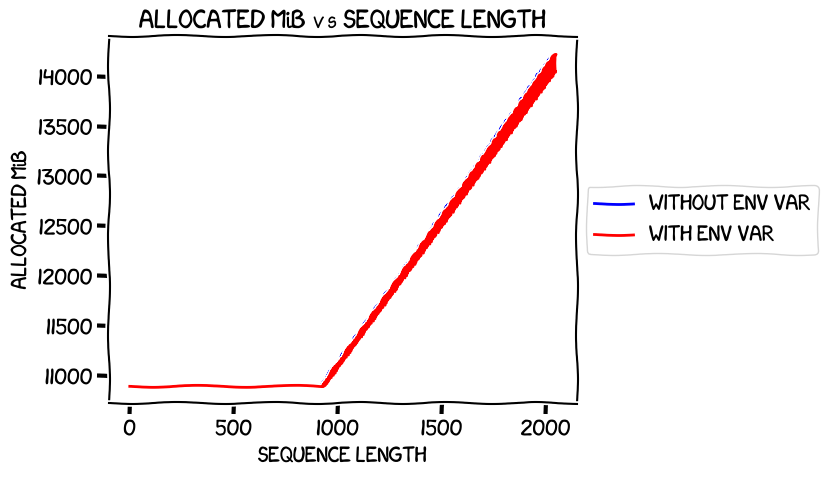

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(without_df['Sequence length'], without_df['Allocated MiB'], 
        label='WITHOUT ENV VAR', color='blue')
ax.plot(with_df['Sequence length'], with_df['Allocated MiB'], 
        label='WITH ENV VAR', color='red')

ax.set_xlabel('SEQUENCE LENGTH')
ax.set_ylabel('ALLOCATED MiB')
ax.set_title('ALLOCATED MiB vs SEQUENCE LENGTH')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to accommodate legend
plt.savefig("/tmp/sequence-length-vs-allocated-comparison.png", bbox_inches='tight')
plt.show()

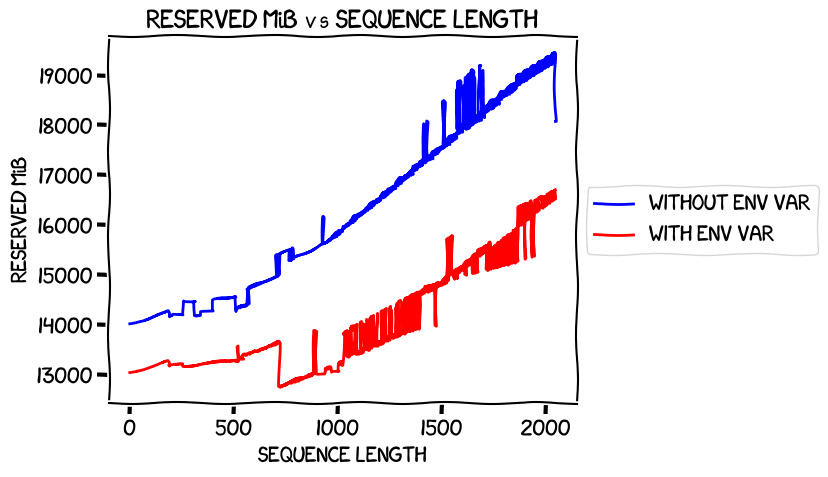

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(without_df['Sequence length'], without_df['Reserved MiB'], 
        label='WITHOUT ENV VAR', color='blue')
ax.plot(with_df['Sequence length'], with_df['Reserved MiB'], 
        label='WITH ENV VAR', color='red')

ax.set_xlabel('SEQUENCE LENGTH')
ax.set_ylabel('RESERVED MiB')
ax.set_title('RESERVED MiB vs SEQUENCE LENGTH')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to accommodate legend
plt.savefig("/tmp/sequence-length-vs-reserved-comparison.png", bbox_inches='tight')
plt.show()

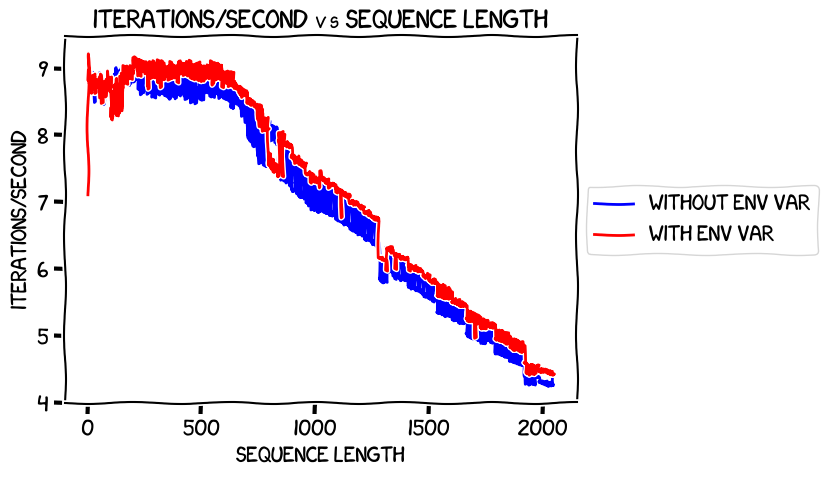

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot iterations/second from both dataframes
ax.plot(without_df['Sequence length'], without_df['Iterations/second'], 
        label='WITHOUT ENV VAR', color='blue')
ax.plot(with_df['Sequence length'], with_df['Iterations/second'], 
        label='WITH ENV VAR', color='red')

# Set labels and title
ax.set_xlabel('SEQUENCE LENGTH')
ax.set_ylabel('ITERATIONS/SECOND')
ax.set_title('ITERATIONS/SECOND vs SEQUENCE LENGTH')

# Add legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout and save
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to accommodate legend
plt.savefig("/tmp/sequence-length-vs-iterations-per-second-comparison.png", bbox_inches='tight')
plt.show()

In [11]:
import numpy as np

# Filter the dataframe to include only the data points after the flat segment
threshold = 918
linear_segment = without_df[without_df['Sequence length'] >= threshold]

# Extract x and y values
x = linear_segment['Sequence length'].values
y = linear_segment['Allocated MiB'].values

# Perform linear regression
a, b = np.polyfit(x, y, 1)

print(f"Linear approximation: y = {a:.4f}x + {b:.4f}")

Linear approximation: y = 2.9598x + 8163.2190


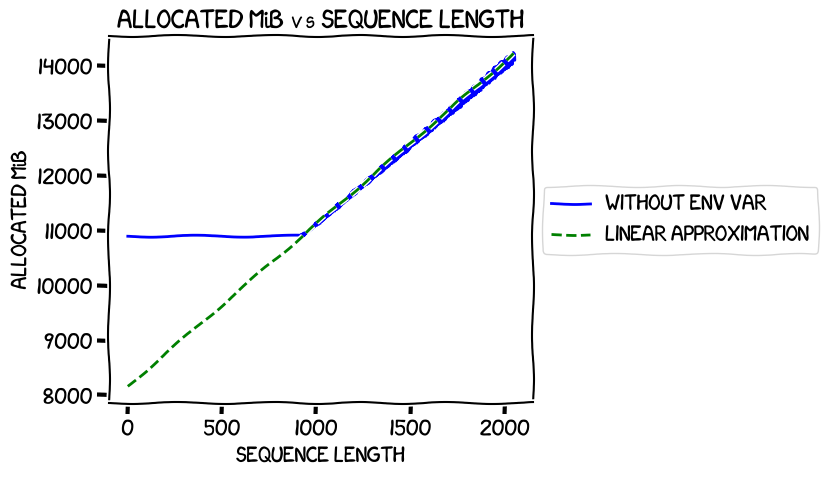

In [13]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the original data
ax.plot(without_df['Sequence length'], without_df['Allocated MiB'], 
        label='WITHOUT ENV VAR', color='blue')

# Generate points for the linear approximation line
# Using the full range of x values
x_line = np.linspace(without_df['Sequence length'].min(), without_df['Sequence length'].max(), 100)
y_line = 2.9598 * x_line + 8163.2190

# Plot the linear approximation
ax.plot(x_line, y_line, label='LINEAR APPROXIMATION', color='green', linestyle='--')

# Set labels and title
ax.set_xlabel('SEQUENCE LENGTH')
ax.set_ylabel('ALLOCATED MiB')
ax.set_title('ALLOCATED MiB vs SEQUENCE LENGTH')

# Add legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout and save
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("/tmp/sequence-length-vs-allocated-comparison-with-linear.png", bbox_inches='tight')
plt.show()